In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay,  make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, mean_absolute_error

In [2]:
df = pd.read_csv(r'LPD_train.csv', encoding = "ISO-8859-1")
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [4]:
df['Gender of the patient'].value_counts()

Gender of the patient
Male      21986
Female     7803
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [6]:
df['Gender of the patient'] = np.where(df['Gender of the patient'].isnull(), 'other', df['Gender of the patient'])

In [7]:
df['Gender of the patient'].replace(['Male','Female', 'other'], [0,1,2], inplace = True)
df['Result'].replace([1,2], [0,1], inplace = True)

In [8]:
cols = df.columns

In [9]:
for col in cols:
    if (len(df[col].unique()) > 5):
        df[col].fillna(df[col].mean(), inplace = True)

In [10]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

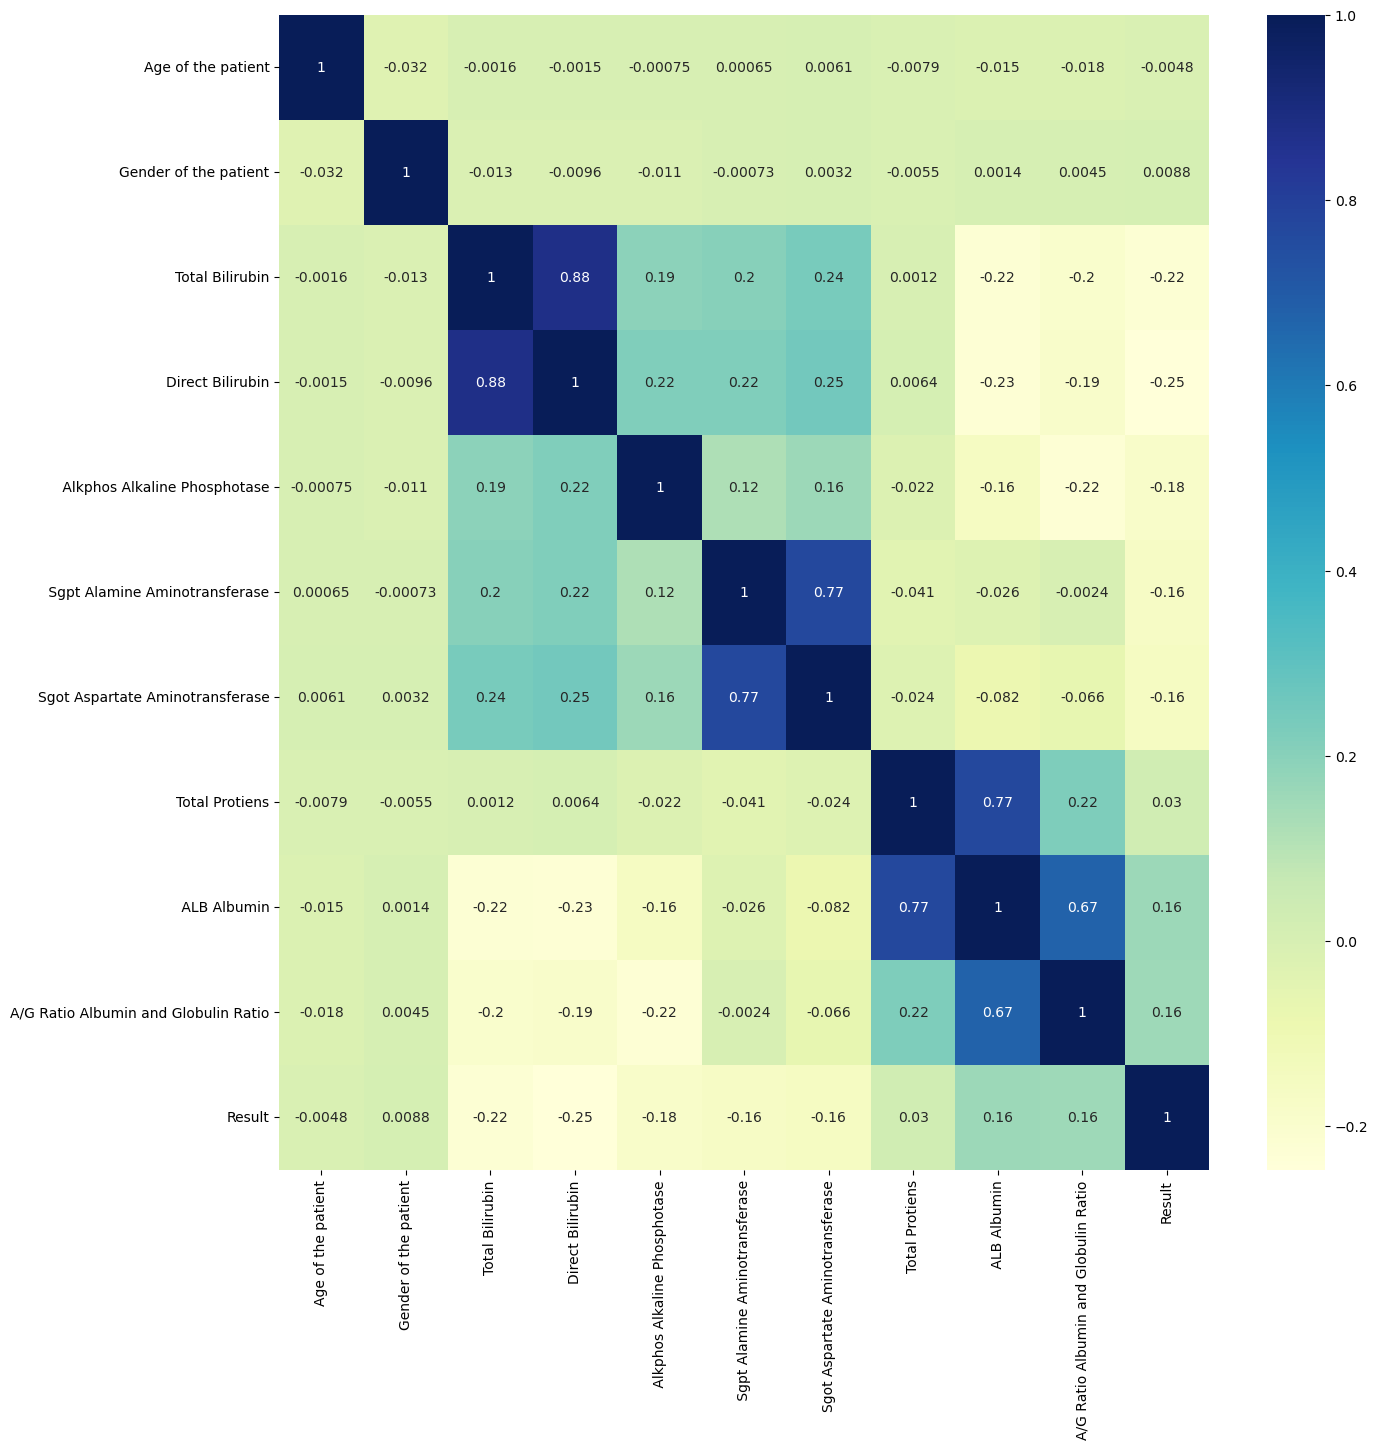

In [11]:
plt.figure(figsize= (15,15))
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 1600x1200 with 0 Axes>

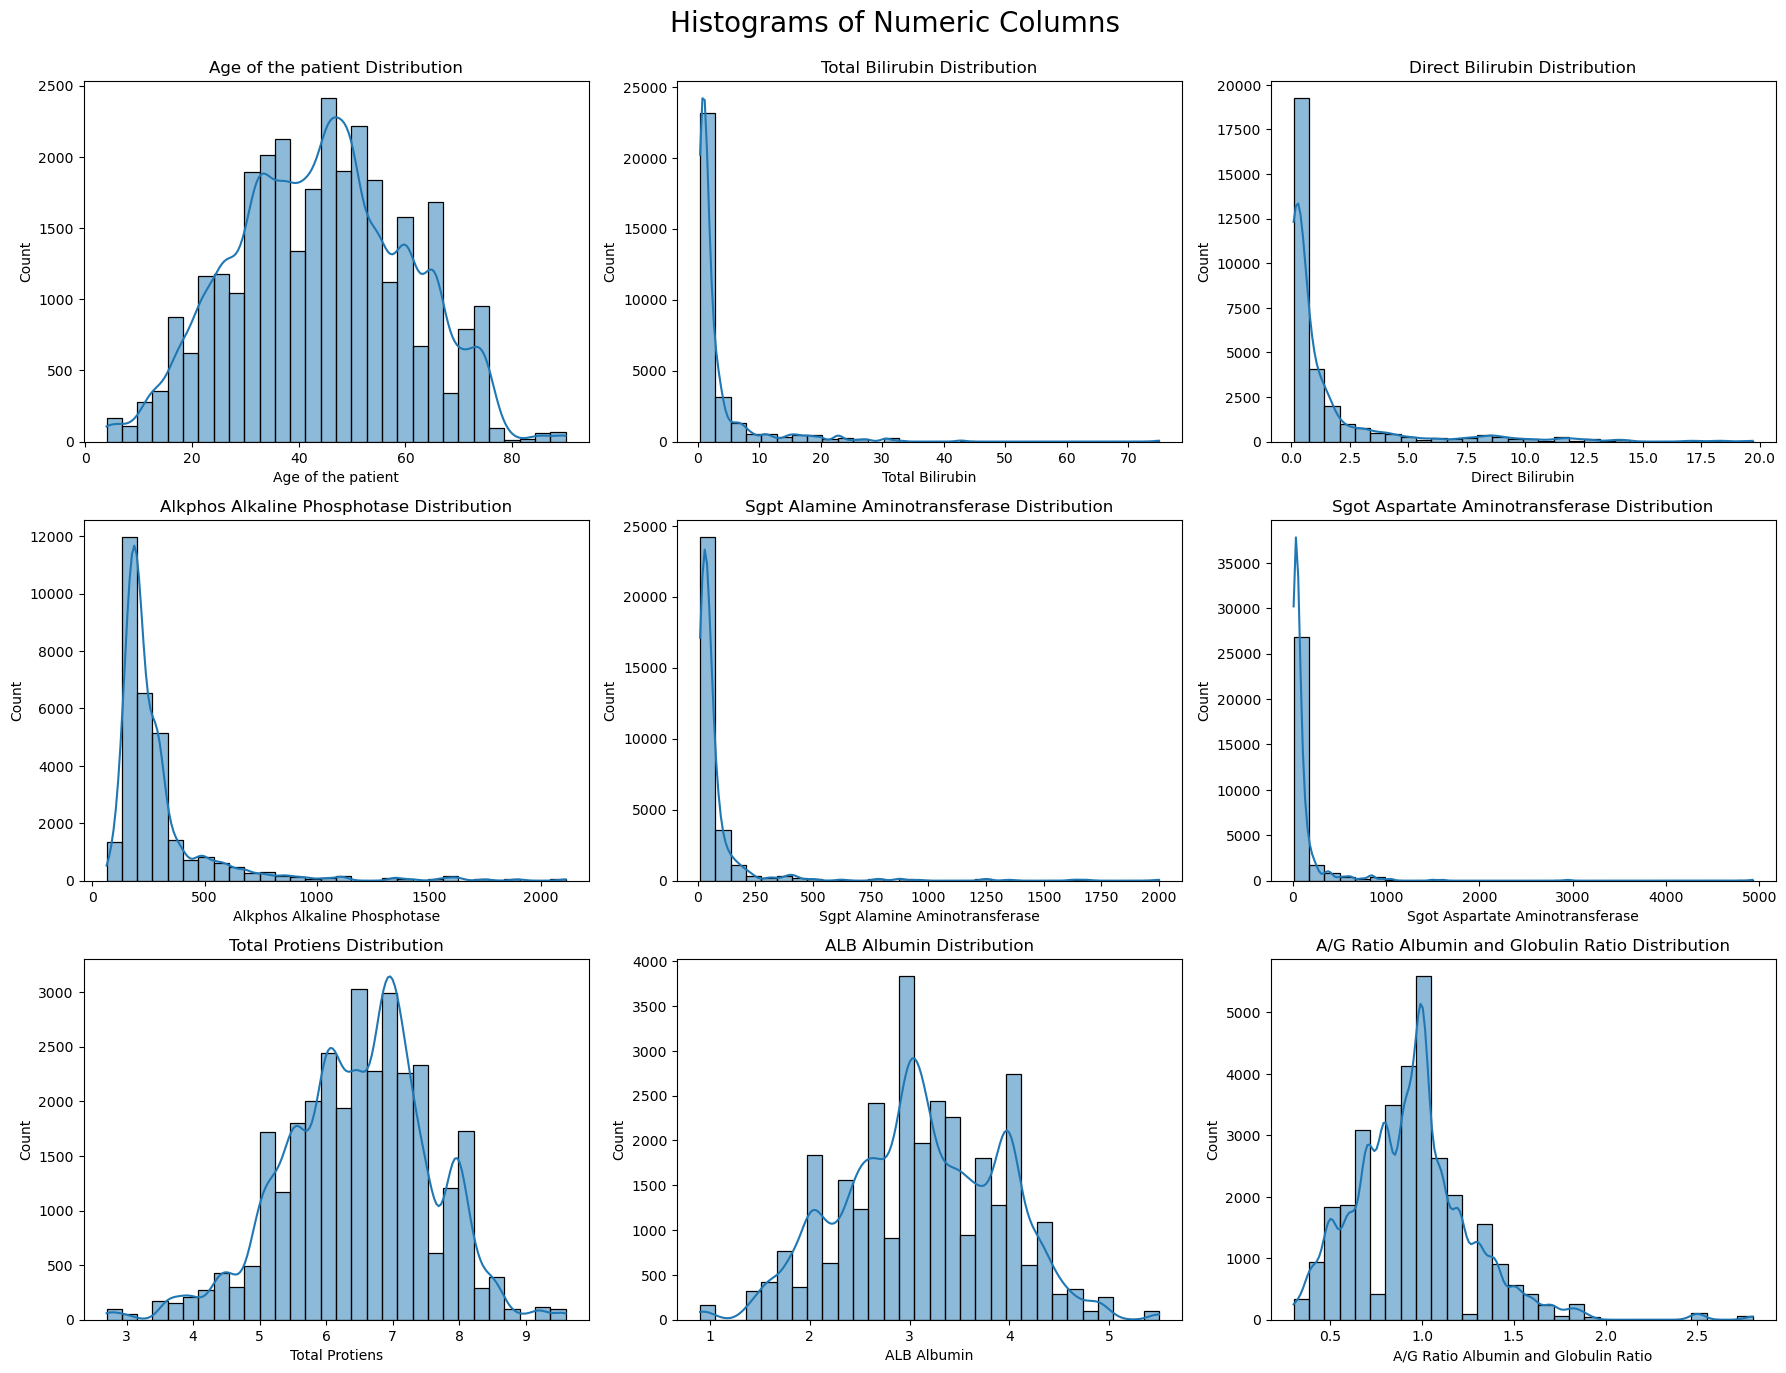

In [12]:
# Strip any leading or trailing whitespace from the column names
df.columns = df.columns.str.strip()

# Set the figure size for the plots
plt.figure(figsize=(16, 12))

# List of numeric columns to plot
numeric_columns = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
                   'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
                   'Sgot Aspartate Aminotransferase', 'Total Protiens',
                   'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

# Plot histograms for numeric columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(18, 18))

for i, col in enumerate(numeric_columns):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df[col], bins=30, ax=axes[row, col_idx], kde=True)
    axes[row, col_idx].set_title(f'{col} Distribution')

# Remove any empty plots if present
for i in range(len(numeric_columns), (len(numeric_columns) // 3 + 1) * 3):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Histograms of Numeric Columns', fontsize=20)
plt.show()


In [13]:
highlySkewed = []
for col in numeric_columns:
    if df[col].skew() < -1.5 or df[col].skew() > 1.5:
        highlySkewed.append(col)
    print(f'{col} Skewness {df[col].skew()}')


Age of the patient Skewness 0.027818655266329054
Total Bilirubin Skewness 4.7146477421263535
Direct Bilirubin Skewness 3.1860148365004024
Alkphos Alkaline Phosphotase Skewness 3.8275220532918506
Sgpt Alamine Aminotransferase Skewness 6.513815542536389
Sgot Aspartate Aminotransferase Skewness 10.423362538112288
Total Protiens Skewness -0.2927600611931897
ALB Albumin Skewness -0.03930278480658314
A/G Ratio Albumin and Globulin Ratio Skewness 1.067390460015038


In [14]:
df_copy = df.copy()

for col in highlySkewed:
    df_copy[col] = np.log(df_copy[col])
    print(f'{col} Skewness {df_copy[col].skew()}')

Total Bilirubin Skewness 1.2438845213185576
Direct Bilirubin Skewness 0.7700385274766314
Alkphos Alkaline Phosphotase Skewness 1.2867475836882747
Sgpt Alamine Aminotransferase Skewness 1.361076328379432
Sgot Aspartate Aminotransferase Skewness 1.1173366093124815


<Figure size 1600x1200 with 0 Axes>

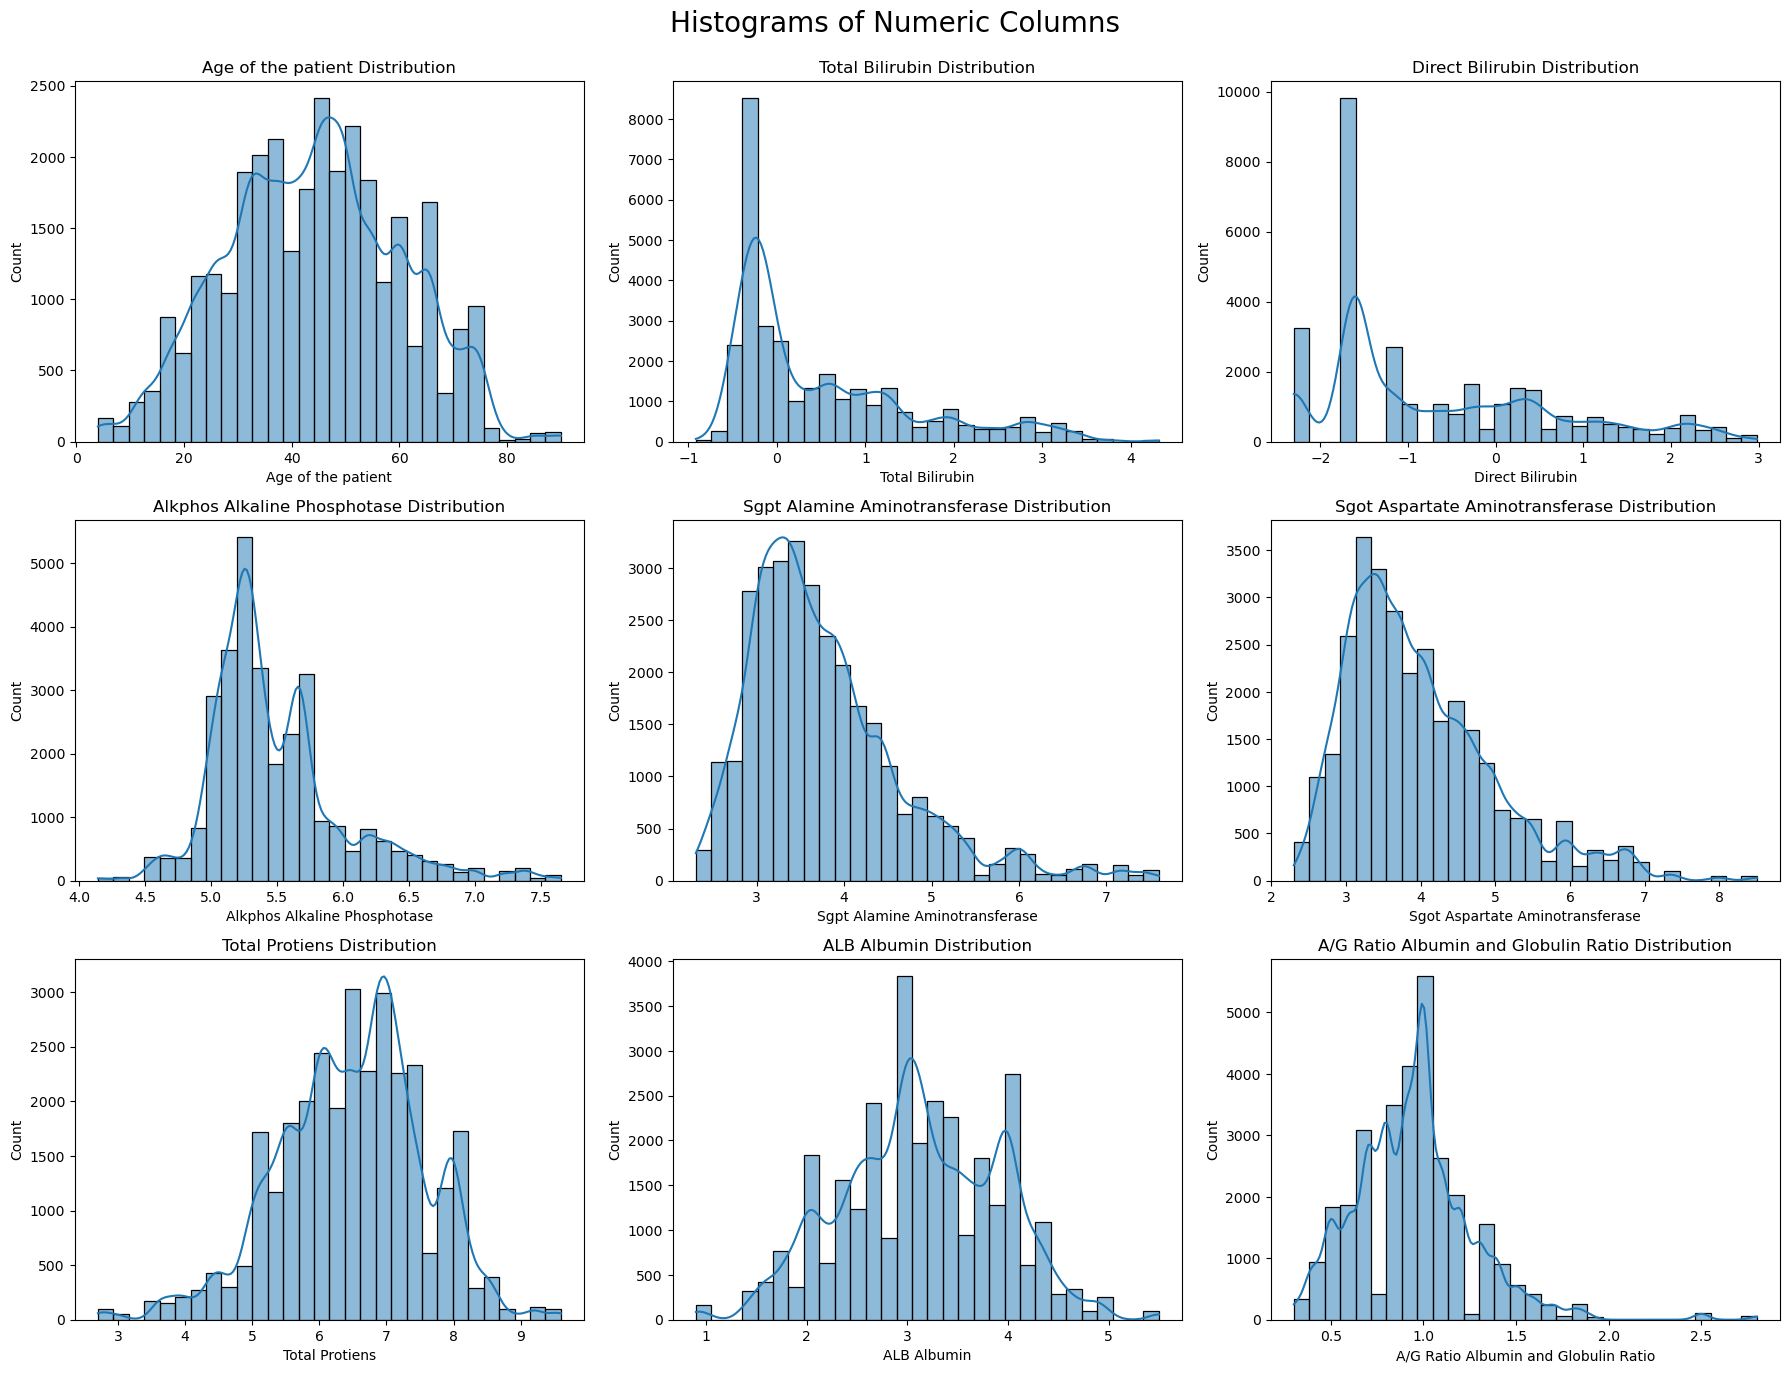

In [15]:
# Strip any leading or trailing whitespace from the column names
df_copy.columns = df_copy.columns.str.strip()

# Set the figure size for the plots
plt.figure(figsize=(16, 12))

# List of numeric columns to plot
numeric_columns = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
                   'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
                   'Sgot Aspartate Aminotransferase', 'Total Protiens',
                   'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

# Plot histograms for numeric columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(18, 18))

for i, col in enumerate(numeric_columns):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df_copy[col], bins=30, ax=axes[row, col_idx], kde=True)
    axes[row, col_idx].set_title(f'{col} Distribution')

# Remove any empty plots if present
for i in range(len(numeric_columns), (len(numeric_columns) // 3 + 1) * 3):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Histograms of Numeric Columns', fontsize=20)
plt.show()


In [16]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age of the patient,30691.0,44.107205,15.980523,4.000000,32.000000,45.000000,55.000000,90.000000
Gender of the patient,30691.0,0.313023,0.523286,0.000000,0.000000,0.000000,1.000000,2.000000
Total Bilirubin,30691.0,0.493153,1.022685,-0.916291,-0.223144,0.000000,1.029619,4.317488
Direct Bilirubin,30691.0,-0.611791,1.331654,-2.302585,-1.609438,-1.203973,0.336472,2.980619
Alkphos Alkaline Phosphotase,30691.0,5.496021,0.518004,4.143135,5.170484,5.365976,5.680173,7.654443
Sgpt Alamine Aminotransferase,30691.0,3.771413,0.900695,2.302585,3.135494,3.583519,4.158883,7.600902
Sgot Aspartate Aminotransferase,30691.0,3.987741,1.000589,2.302585,3.258097,3.761200,4.499810,8.502891
Total Protiens,30691.0,6.480237,1.073788,2.700000,5.800000,6.500000,7.200000,9.600000
ALB Albumin,30691.0,3.130142,0.785879,0.900000,2.600000,3.100000,3.700000,5.500000
A/G Ratio Albumin and Globulin Ratio,30691.0,0.943467,0.320207,0.300000,0.700000,0.943467,1.100000,2.800000


In [17]:
X = df_copy.drop(['Result'], axis = 1)
P = df_copy['Result']

x_resampled, y_resampled = SMOTE(random_state = 42).fit_resample(X, P)
print(y_resampled.value_counts())

Result
0    21917
1    21917
Name: count, dtype: int64


In [18]:
def print_metrics(model):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'mae': make_scorer(mean_absolute_error)
        }

    # Evaluate final model using cross-validation
    scores = cross_validate(model, x_resampled, y_resampled, scoring=scoring, n_jobs = -1)
    cross_val_scores = cross_val_score(model, x_resampled, y_resampled, cv=5, scoring = 'accuracy', n_jobs = -1)
    test_res = cross_val_predict(model,x_resampled, y_resampled, n_jobs = -1)

    # Print Cross-validation scores
    print(f"Cross-validation Score: {100*cross_val_scores.mean():.2f}")
    print(f"Cross-validation Accuracy: {100*np.mean(scores['test_accuracy']):.2f}")
    print(f"Cross-validation Precision: {100*np.mean(scores['test_precision']):.2f}")
    print(f"Cross-validation Recall: {100*np.mean(scores['test_recall']):.2f}")
    print(f"Cross-validation F1 Score: {100*np.mean(scores['test_f1']):.2f}")
    print(f"Cross-validation MAE: {100*np.mean(scores['test_mae']):.2f}")

    cf = confusion_matrix(y_resampled,test_res)
    cf_plot = ConfusionMatrixDisplay(cf)

    cf_plot.plot()
    plt.show()

Cross-validation Score: 70.69
Cross-validation Accuracy: 70.69
Cross-validation Precision: 71.40
Cross-validation Recall: 70.69
Cross-validation F1 Score: 70.45
Cross-validation MAE: 29.31


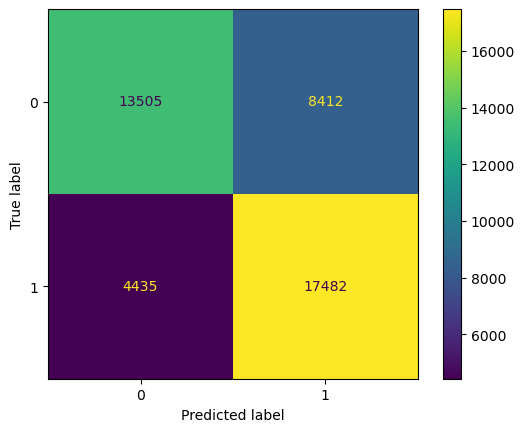

In [19]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
print_metrics(lr)

Cross-validation Score: 98.74
Cross-validation Accuracy: 98.74
Cross-validation Precision: 98.75
Cross-validation Recall: 98.74
Cross-validation F1 Score: 98.74
Cross-validation MAE: 1.26


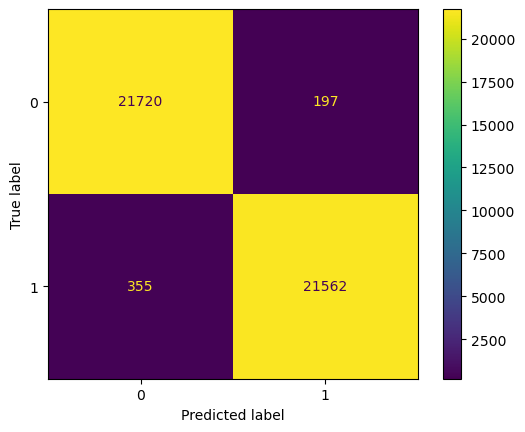

In [20]:
dtc = DecisionTreeClassifier(random_state = 42)
print_metrics(dtc)

Cross-validation Score: 99.68
Cross-validation Accuracy: 99.68
Cross-validation Precision: 99.68
Cross-validation Recall: 99.68
Cross-validation F1 Score: 99.68
Cross-validation MAE: 0.32


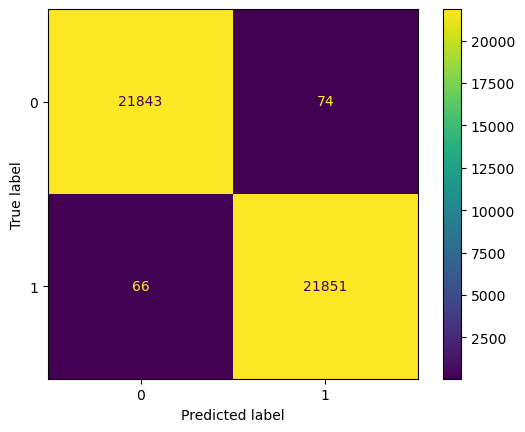

In [21]:
rf = RandomForestClassifier(random_state = 42)
print_metrics(rf)

Cross-validation Score: 84.64
Cross-validation Accuracy: 84.64
Cross-validation Precision: 86.05
Cross-validation Recall: 84.64
Cross-validation F1 Score: 84.49
Cross-validation MAE: 15.36


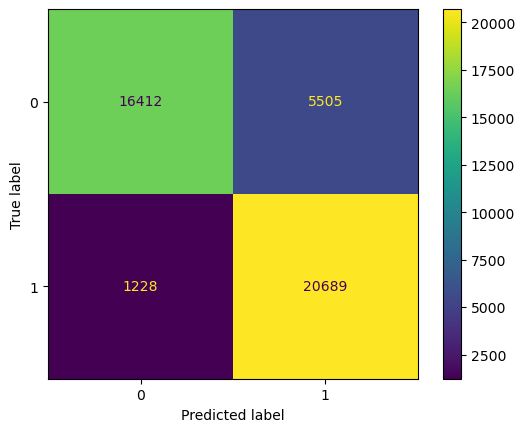

In [22]:
knn = KNeighborsClassifier()
print_metrics(knn)

Cross-validation Score: 70.51
Cross-validation Accuracy: 70.51
Cross-validation Precision: 72.54
Cross-validation Recall: 70.51
Cross-validation F1 Score: 69.83
Cross-validation MAE: 29.49


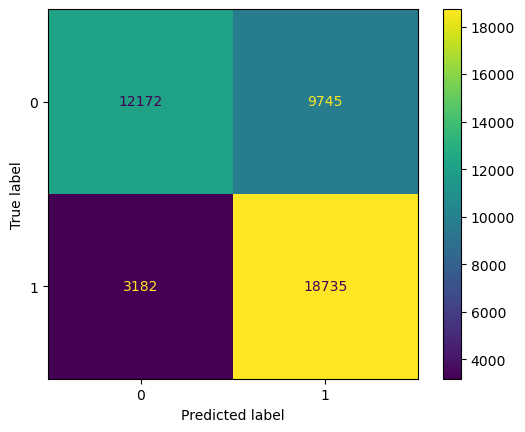

In [23]:
svc = SVC(kernel = 'linear', probability = True)
print_metrics(svc)

Cross-validation Score: 82.41
Cross-validation Accuracy: 82.41
Cross-validation Precision: 83.85
Cross-validation Recall: 82.41
Cross-validation F1 Score: 82.21
Cross-validation MAE: 17.59


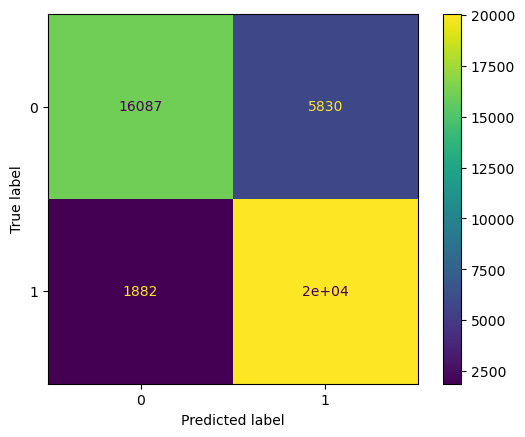

In [24]:
mlp = MLPClassifier(max_iter = 1000, random_state = 42)
print_metrics(mlp)

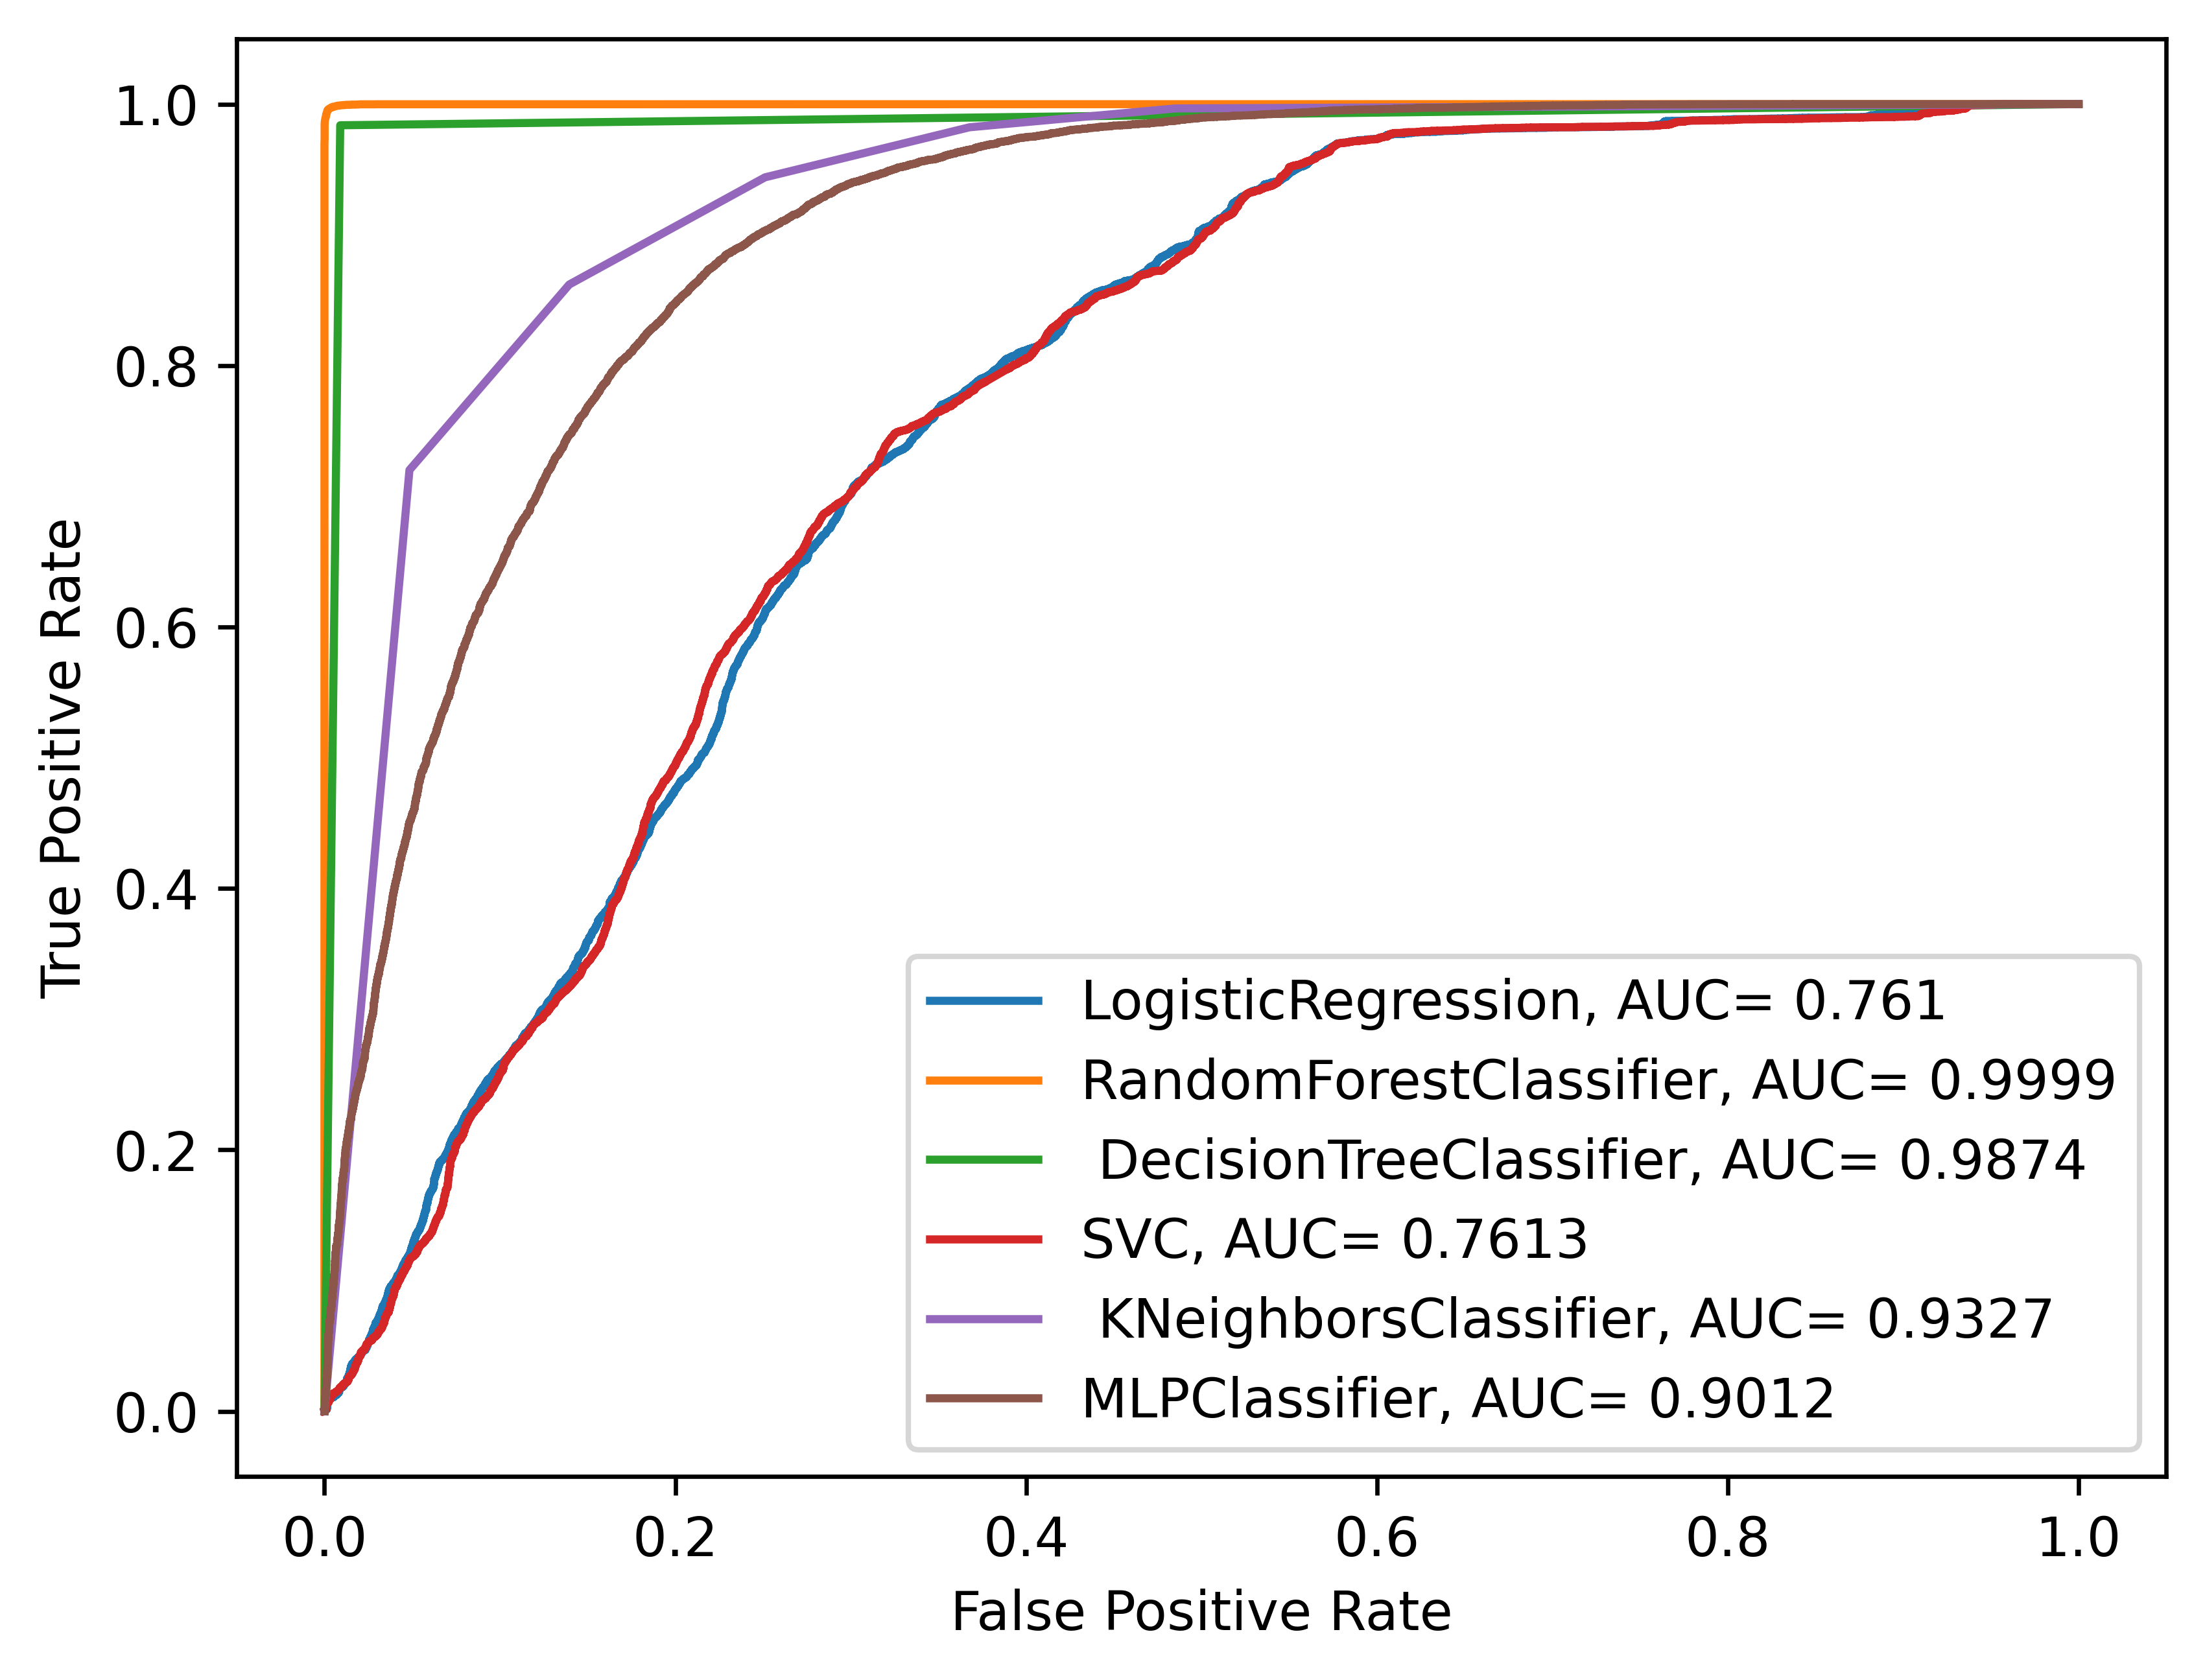

In [25]:
#set up plotting area
plt.figure(0, dpi = 600 ).clf()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#logistic regression model
def plot_roc(model, X, P, label) :
    test_res = cross_val_predict(model, X, P, method='predict_proba', n_jobs = -1)[:,1]
    fpr, tpr, _ = metrics.roc_curve(P, test_res)
    auc = round(metrics.roc_auc_score(P, test_res), 4)
    plt.plot(fpr,tpr,label=f"{label}, AUC= {auc}")

plot_roc(lr, x_resampled, y_resampled, "LogisticRegression")
plot_roc(rf, x_resampled, y_resampled, "RandomForestClassifier")
plot_roc(dtc, x_resampled, y_resampled, " DecisionTreeClassifier")
plot_roc(svc, x_resampled, y_resampled, "SVC")
plot_roc(knn,x_resampled, y_resampled, " KNeighborsClassifier")
plot_roc(mlp, x_resampled, y_resampled, "MLPClassifier")

plt.legend()

plt.savefig('liver.png')
plt.show()